# Signal Generator

## Valid Signal Generator Clocks

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
SysClk = 80e6
SamplesPerPeriod = 2 * 500 * 16
Overhead = 16/17.5

In [31]:
def SSIClkGenerator():
    for multiplier in range(1, 18+1):
        for predivider in range(2, 254+1, 2):
            for divider in range(1, 256+1, 1):
                SSIFrequency = SysClk / (predivider*divider)
                Frequency = SSIFrequency * Overhead * multiplier / SamplesPerPeriod
                if Frequency >= 19.5 and SSIFrequency <= 20.5e6:
                    yield multiplier, predivider, divider, SSIFrequency, Frequency

In [32]:
data = pd.DataFrame(SSIClkGenerator(), columns=("multiplier", "predivider", "divider", "SSIFrequency", "Frequency"))

In [33]:
data = data.sort_values(by=["Frequency", "multiplier", "predivider", "divider"])

In [34]:
def UniqueGenerator(clk, name):
    last = None
    for index, line in clk.iterrows():
        if last != line[name]:
            last = line[name]
            yield line

In [35]:
data = pd.DataFrame(UniqueGenerator(data, "Frequency"))

In [36]:
n = 33
data["m"] = np.round(n * np.log10(data["Frequency"]/20))

In [37]:
data["error"] = (20 * (10**data["m"])**(1/n) - data["Frequency"]) / data["Frequency"]

In [38]:
data["fom"] = (data["multiplier"]-1) * 0.001 + np.abs(data["error"])

In [39]:
data = data.sort_values(by=["m", "fom"])

In [40]:
data = pd.DataFrame(UniqueGenerator(data, "m"))

In [41]:
data

,multiplier,predivider,divider,SSIFrequency,Frequency,m,error,fom
2598,3.0,14.0,49.0,1.166181e+05,19.991670,-0.0,0.000417,0.002417
788,2.0,2.0,213.0,1.877934e+05,21.462106,1.0,-0.000781,0.001781
774,2.0,2.0,199.0,2.010050e+05,22.972003,2.0,0.001007,0.002007
2181,3.0,4.0,139.0,1.438849e+05,24.665982,3.0,-0.000367,0.002367
748,2.0,2.0,173.0,2.312139e+05,26.424443,4.0,0.000544,0.001544
2028,3.0,2.0,242.0,1.652893e+05,28.335301,5.0,0.000501,0.002501
73,1.0,2.0,75.0,5.333333e+05,30.476190,6.0,-0.002558,0.002558
68,1.0,2.0,70.0,5.714286e+05,32.653061,7.0,-0.001778,0.001778
706,2.0,2.0,131.0,3.053435e+05,34.896401,8.0,0.001552,0.002552
59,1.0,2.0,61.0,6.557377e+05,37.470726,9.0,0.000150,0.000150


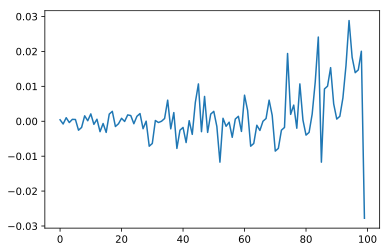

In [42]:
plt.plot(data["error"].values)

In [43]:
for index, row in data.iterrows():
    print("\t{{{}, {}, {}}}, // {}".format(int(row["multiplier"]), int(row["predivider"]), int(row["divider"]), round(row["Frequency"], 2)))

	{3, 14, 49}, // 19.99
	{2, 2, 213}, // 21.46
	{2, 2, 199}, // 22.97
	{3, 4, 139}, // 24.67
	{2, 2, 173}, // 26.42
	{3, 2, 242}, // 28.34
	{1, 2, 75}, // 30.48
	{1, 2, 70}, // 32.65
	{2, 2, 131}, // 34.9
	{1, 2, 61}, // 37.47
	{1, 2, 57}, // 40.1
	{1, 2, 53}, // 43.13
	{2, 2, 99}, // 46.18
	{1, 2, 46}, // 49.69
	{1, 2, 43}, // 53.16
	{1, 2, 40}, // 57.14
	{2, 2, 75}, // 60.95
	{1, 2, 35}, // 65.31
	{2, 2, 65}, // 70.33
	{3, 2, 91}, // 75.35
	{3, 2, 85}, // 80.67
	{5, 2, 132}, // 86.58
	{3, 2, 74}, // 92.66
	{1, 2, 23}, // 99.38
	{5, 2, 107}, // 106.81
	{1, 2, 20}, // 114.29
	{3, 2, 56}, // 122.45
	{3, 2, 52}, // 131.87
	{5, 2, 81}, // 141.09
	{1, 2, 15}, // 152.38
	{1, 2, 14}, // 163.27
	{7, 2, 92}, // 173.91
	{4, 2, 49}, // 186.59
	{7, 2, 80}, // 200.0
	{3, 2, 32}, // 214.29
	{1, 2, 10}, // 228.57
	{4, 2, 37}, // 247.1
	{3, 2, 26}, // 263.74
	{1, 2, 8}, // 285.71
	{2, 2, 15}, // 304.76
	{1, 2, 7}, // 326.53
	{2, 2, 13}, // 351.65
	{10, 2, 61}, // 374.71
	{3, 2, 17}, // 403.36
	{3, 2, 